In [ ]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [ ]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

# Quantum Half Adder

In [ ]:
# instance the quantum circuit
qha_qr = QuantumRegister(3)
qha_template = QuantumCircuit(qha_qr)
qha_template.ccx(qha_qr[0],qha_qr[1],qha_qr[2])
qha_template.cnot(qha_qr[0],qha_qr[1])

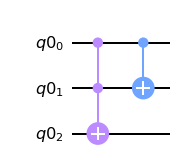

In [ ]:
qha_template.draw("mpl")

In [ ]:
qha = qha_template.to_gate(label = "quantum half adder")

## Quantum Half Adder Experiment

In [ ]:
# create experimental circuit 
qfa_exp_qr = QuantumRegister(3)
qfa_exp_cr = ClassicalRegister(3)
qfa_exp = QuantumCircuit(qfa_exp_qr,qfa_exp_cr)

In [ ]:
# initial conditions
qfa_exp.x(qfa_exp_qr[0])
qfa_exp.x(qfa_exp_qr[1])
qfa_exp.barrier()

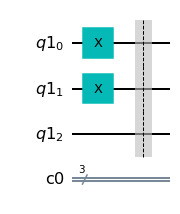

In [ ]:
qfa_exp.draw("mpl")

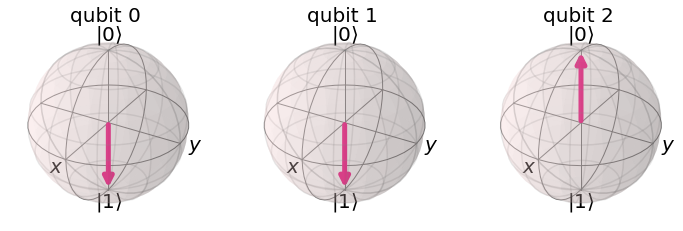

In [ ]:
plot_bloch_multivector(execute(qfa_exp,backend).result().get_statevector())

In [ ]:
# apply quantum half adder
qfa_exp.append(qha,[qfa_exp_qr[0],qfa_exp_qr[1],qfa_exp_qr[2]])

In [ ]:
# measure quantum circuit
for i in range(3):
  qfa_exp.measure(qfa_exp_qr[i],qfa_exp_cr[i])

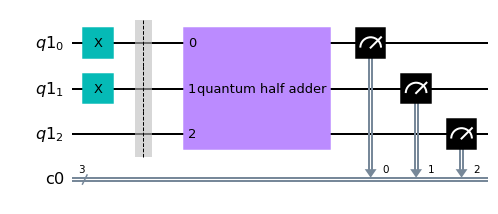

In [ ]:
qfa_exp.draw("mpl")

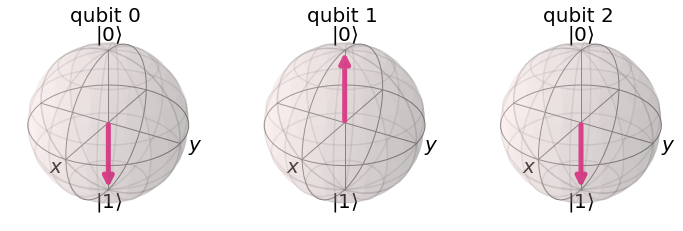

In [ ]:
plot_bloch_multivector(execute(qfa_exp,backend).result().get_statevector())

In [ ]:
num_experiments = 1024

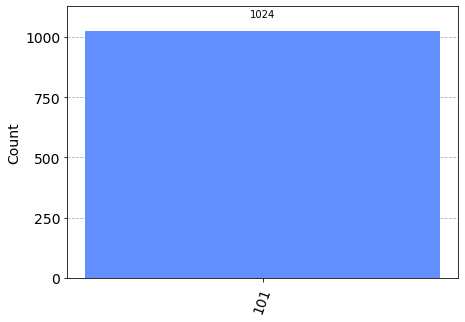

In [ ]:
# make a lot of experiments
qc_compiled = transpile(qfa_exp,backend)
job = backend.run(qc_compiled,shots = num_experiments)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Quantum Full Adder

In [ ]:
# create template circuit 
qfa_qr = QuantumRegister(4)
qfa_template = QuantumCircuit(qfa_qr)
qfa_template.csx(qfa_qr[1],qfa_qr[3])
qfa_template.cx(qfa_qr[0],qfa_qr[1])
qfa_template.csx(qfa_qr[2],qfa_qr[3])
qfa_template.csx(qfa_qr[0],qfa_qr[3])
qfa_template.cx(qfa_qr[1],qfa_qr[2])
qfa_template.crx(-math.pi / 2,qfa_qr[2],qfa_qr[3])


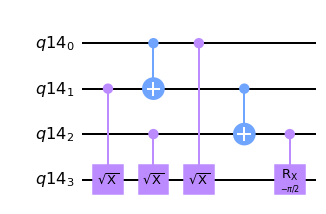

In [ ]:
qfa_template.draw("mpl")

In [ ]:
qfa = qfa_template.to_gate(label = "quantum full adder")

In [ ]:
# create experimental circuit 
qfa_exp_qr = QuantumRegister(4)
qfa_exp_cr = ClassicalRegister(4)
qfa_exp = QuantumCircuit(qfa_exp_qr,qfa_exp_cr)

In [ ]:
# setup the experiment initial conditions
qfa_exp.x(qfa_exp_qr[0])
qfa_exp.x(qfa_exp_qr[1])
qfa_exp.x(qfa_exp_qr[2])
qfa_exp.barrier()

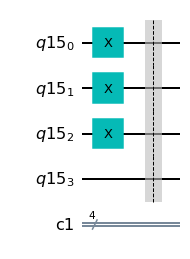

In [ ]:
qfa_exp.draw("mpl")

In [ ]:
qfa_exp.append(qfa,[qfa_exp_qr[0],qfa_exp_qr[1],qfa_exp_qr[2],qfa_exp_qr[3]])

In [ ]:
for i in range(2,4):
  qfa_exp.measure(qfa_exp_qr[i],qfa_exp_cr[i])

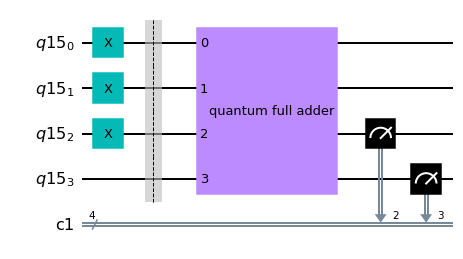

In [ ]:
qfa_exp.draw("mpl")

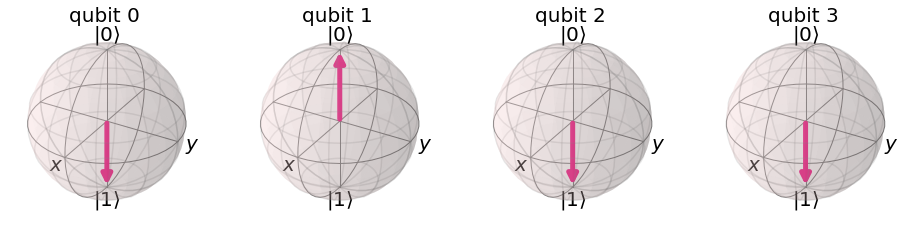

In [ ]:
plot_bloch_multivector(execute(qfa_exp,backend).result().get_statevector())

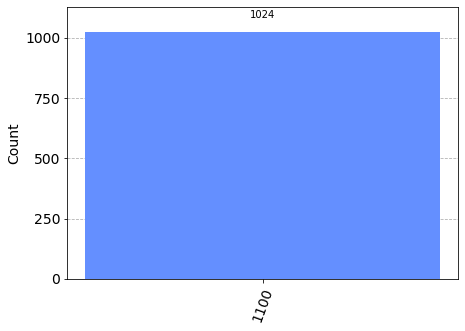

In [ ]:
# make a lot of experiments
qc_compiled = transpile(qfa_exp,backend)
job = backend.run(qc_compiled,shots = num_experiments)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)